In [2]:
pip install pandas matplotlib openpyxl statsmodels


Note: you may need to restart the kernel to use updated packages.


        Date  Closing Value
0 1986-01-02          25.56
1 1986-01-03          26.00
2 1986-01-06          26.53
3 1986-01-07          25.85
4 1986-01-08          25.87


C:\Users\heman\AppData\Local\Temp\ipykernel_17864\755154941.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


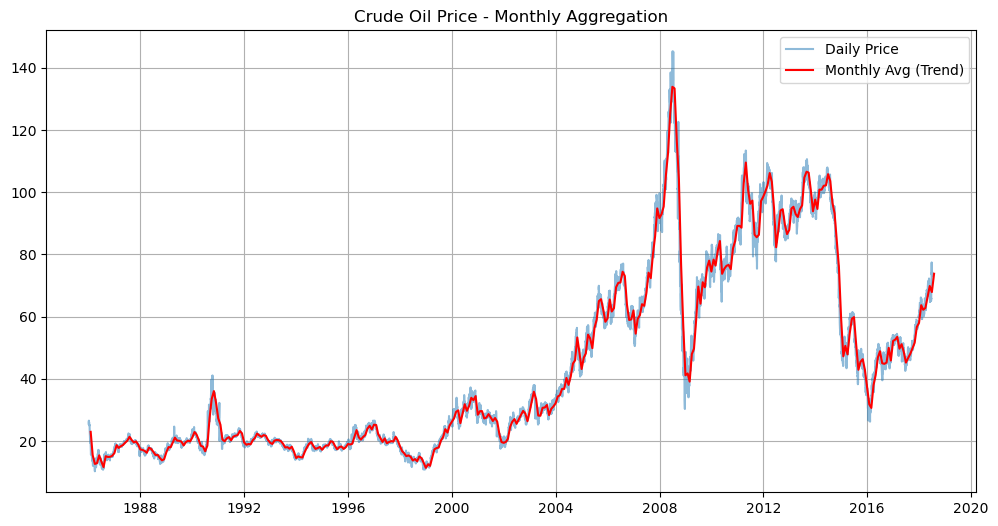

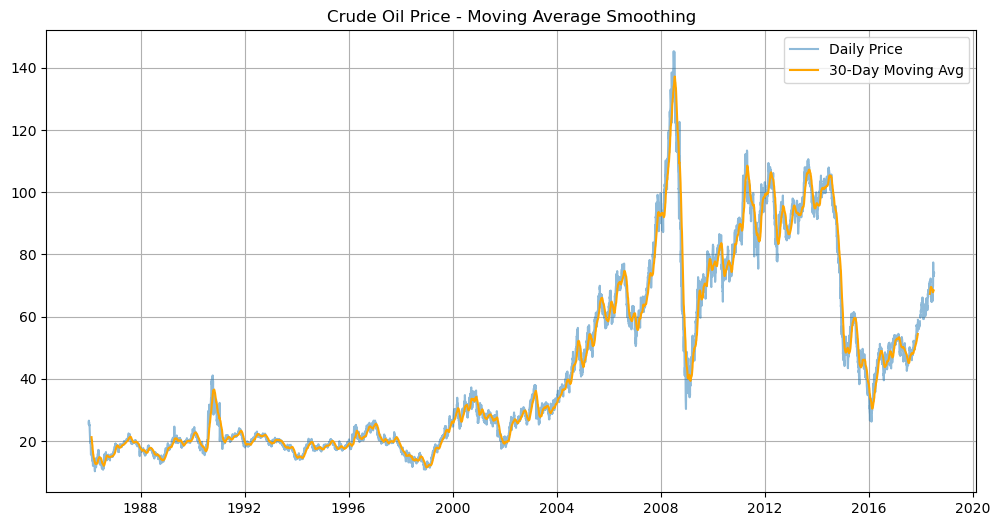

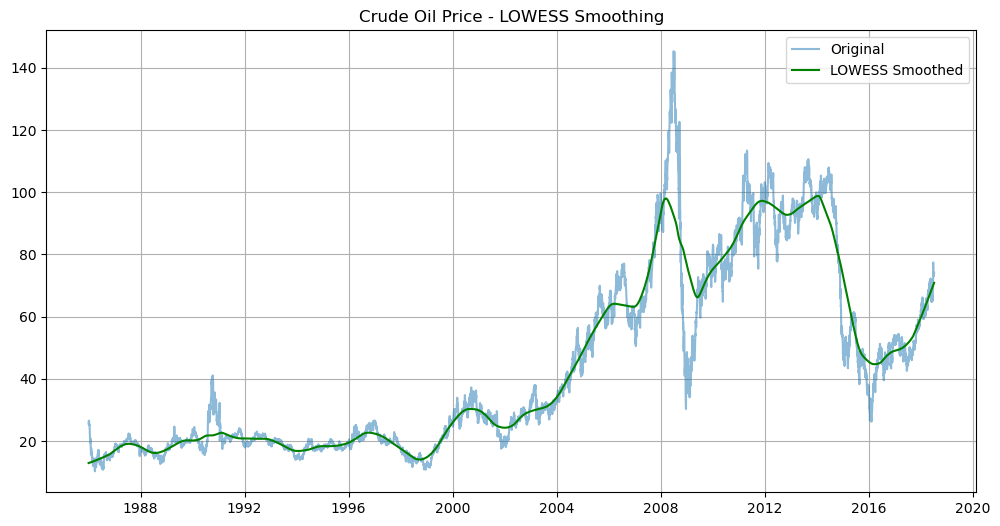

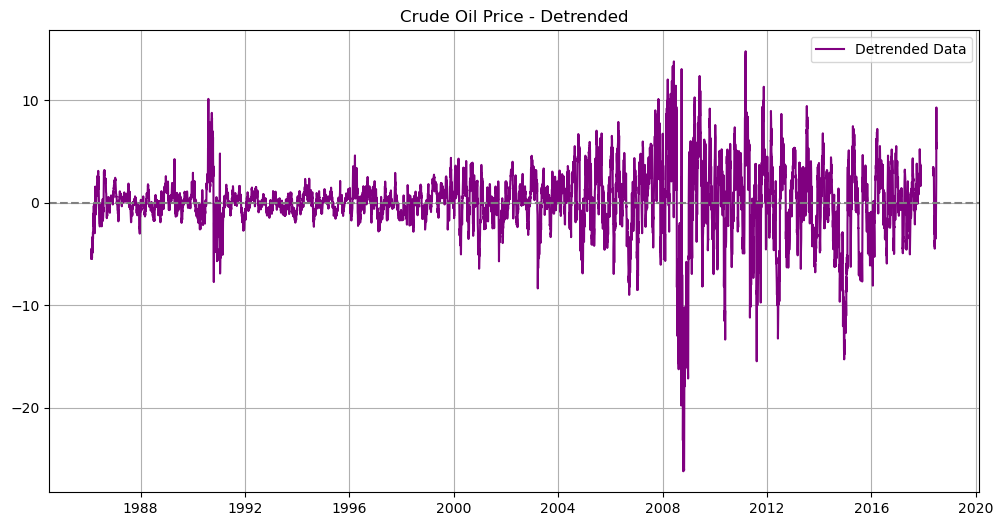

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the data
file_path = r"C:\Users\heman\Downloads\Crude Oil Prices Daily.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())

# Rename columns if needed
df.columns = ['Date', 'Price']

# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date
df = df.sort_values('Date')

# Set Date as index
df.set_index('Date', inplace=True)

# -----------------------------
# 🟢 Aggregation (e.g., Monthly Average)
# -----------------------------
monthly_avg = df.resample('M').mean()

# Plot original and aggregated
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Daily Price', alpha=0.5)
plt.plot(monthly_avg.index, monthly_avg['Price'], label='Monthly Avg (Trend)', color='red')
plt.title('Crude Oil Price - Monthly Aggregation')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 🟢 Smoothing (Moving Average)
# -----------------------------
df['SMA_30'] = df['Price'].rolling(window=30).mean()  # 30-day moving average

# Plot with smoothing
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Daily Price', alpha=0.5)
plt.plot(df.index, df['SMA_30'], label='30-Day Moving Avg', color='orange')
plt.title('Crude Oil Price - Moving Average Smoothing')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 🟢 LOWESS Smoothing
# -----------------------------
lowess_smoothed = lowess(df['Price'], df.index, frac=0.05)
lowess_df = pd.DataFrame(lowess_smoothed, columns=['Date', 'Smoothed'])
lowess_df['Date'] = pd.to_datetime(lowess_df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Original', alpha=0.5)
plt.plot(lowess_df['Date'], lowess_df['Smoothed'], label='LOWESS Smoothed', color='green')
plt.title('Crude Oil Price - LOWESS Smoothing')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 🧽 Detrending (Removing trend)
# -----------------------------
detrended = df['Price'] - df['SMA_30']
plt.figure(figsize=(12, 6))
plt.plot(detrended.index, detrended, label='Detrended Data', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Crude Oil Price - Detrended')
plt.grid(True)
plt.legend()
plt.show()
